<a href="https://colab.research.google.com/github/luoChengwen/Tensorflow_test/blob/master/NLP_binary_IMDB_classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !pip install tensorflow==2.0.0-beta0



In [1]:
import json
import tensorflow as tf
import csv
import random
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
print(tf.__version__)

embedding_dim = 100
max_length = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size=200000
#Your dataset size here. Experiment using smaller values (i.e. 16000), but don't forget to train on at least 160000 to see the best effects
test_portion= .1

corpus = []

2.0.0-beta0


In [2]:

# Note that I cleaned the Stanford dataset to remove LATIN1 encoding to make it easier for Python CSV reader
# You can do that yourself with:
# iconv -f LATIN1 -t UTF8 training.1600000.processed.noemoticon.csv -o training_cleaned.csv
# I then hosted it on my site to make it easier to use in this notebook

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/training_cleaned.csv \
    -O /tmp/training_cleaned.csv



--2019-08-16 02:03:51--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/training_cleaned.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.140.128, 2a00:1450:400c:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 238942690 (228M) [application/octet-stream]
Saving to: ‘/tmp/training_cleaned.csv’

/tmp/training_clean 100%[===================>] 227.87M  59.3MB/s    in 3.8s    

2019-08-16 02:03:55 (59.3 MB/s) - ‘/tmp/training_cleaned.csv’ saved [238942690/238942690]



In [3]:
import pandas as pd
data = pd.read_csv('/tmp/training_cleaned.csv')
print(data.head(4))
print(len(data))
print(tf.__version__)


   0  ...  @switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
0  0  ...  is upset that he can't update his Facebook by ...                                                                  
1  0  ...  @Kenichan I dived many times for the ball. Man...                                                                  
2  0  ...    my whole body feels itchy and like its on fire                                                                   
3  0  ...  @nationwideclass no, it's not behaving at all....                                                                  

[4 rows x 6 columns]
1599999
2.0.0-beta0


In [4]:
print(np.shape(data))
print(data.iloc[0,0])
print(data.iloc[0,5])
# !pip install tensorflow==2.0.0-beta0

(1599999, 6)
0
is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!


In [0]:
list_item = data.iloc[:,0]
corpus_a= data.iloc[:,5]
corpus = []
for i,j in zip(corpus_a,list_item):
  j2 = 0 if j==0 else 1
  corpus.append([i,j2])
num_sentences = len(corpus)

In [6]:
print(len(list_item))
print(len(corpus))
print(corpus[1])
print(corpus[0])
# Expected Output:
# 1600000
# 1600000
# ["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", 0]

1599999
1599999
['@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds', 0]
["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", 0]


In [7]:
sentences=[]
labels=[]
random.shuffle(corpus)
for x in range(training_size):  # this is for (training + test)
    sentences.append(corpus[x][0])
    labels.append(corpus[x][1])

print(sentences[2])
print(labels[2])

@nairapemberton Sounds like a fun night. I know the Spoons. You must have seen them perform many times when you were a kid. Tell no lies! 
1


In [8]:
split_size = int(test_portion * training_size)
test_sequences = np.asarray(sentences[:split_size])
training_sequences = np.asarray(sentences[split_size:])
test_labels = np.asarray(labels[:split_size]  )
training_labels = np.asarray(labels[split_size:])

tokenizer = Tokenizer(oov_token = oov_tok)
tokenizer.fit_on_texts(training_sequences)  
word_index = tokenizer.word_index
vocab_size=len(word_index) 
print(vocab_size)
print(word_index)
training_sequences = tokenizer.texts_to_sequences(training_sequences)# YOUR CODE HERE
test_sequences = tokenizer.texts_to_sequences(test_sequences)# YOUR CODE HERE

training_padded = pad_sequences(training_sequences, maxlen = max_length, truncating = trunc_type, padding = padding_type)# YOUR CODE HERE
test_padded = pad_sequences(test_sequences, maxlen = max_length, truncating = trunc_type, padding = padding_type)



150801
{'<OOV>': 1, 'i': 2, 'to': 3, 'the': 4, 'a': 5, 'my': 6, 'and': 7, 'you': 8, 'is': 9, 'it': 10, 'in': 11, 'for': 12, 'of': 13, 'on': 14, 'me': 15, 'so': 16, 'have': 17, 'that': 18, 'but': 19, "i'm": 20, 'just': 21, 'with': 22, 'at': 23, 'be': 24, 'not': 25, 'was': 26, 'now': 27, 'this': 28, 'good': 29, 'up': 30, 'day': 31, 'all': 32, 'out': 33, 'get': 34, 'like': 35, 'are': 36, 'no': 37, 'go': 38, 'http': 39, 'quot': 40, 'do': 41, "it's": 42, 'today': 43, 'too': 44, 'work': 45, 'your': 46, 'going': 47, 'love': 48, 'got': 49, 'lol': 50, 'back': 51, 'time': 52, 'from': 53, 'one': 54, 'u': 55, 'what': 56, 'com': 57, 'will': 58, 'know': 59, 'im': 60, 'we': 61, 'about': 62, 'am': 63, 'really': 64, 'amp': 65, "don't": 66, 'had': 67, 'can': 68, 'some': 69, "can't": 70, 'see': 71, 'its': 72, 'if': 73, '2': 74, 'still': 75, 'new': 76, 'well': 77, 'night': 78, 'how': 79, 'thanks': 80, 'think': 81, 'home': 82, 'want': 83, 'there': 84, 'oh': 85, 'when': 86, 'as': 87, 'more': 88, 'miss': 89,

In [9]:
print(vocab_size)
print(word_index['i'])
print(type(training_padded))
print(np.shape(training_padded))
print(training_padded[0])

150801
2
<class 'numpy.ndarray'>
(180000, 16)
[26859    39   149    57 43294   485    36   161     0     0     0     0
     0     0     0     0]


In [10]:
# Note this is the 100 dimension version of GloVe from Stanford
# I unzipped and hosted it on my site to make this notebook easier
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt
embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

--2019-08-16 02:04:18--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.140.128, 2a00:1450:400c:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.140.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 347116733 (331M) [text/plain]
Saving to: ‘/tmp/glove.6B.100d.txt’

/tmp/glove.6B.100d. 100%[===================>] 331.04M  72.6MB/s    in 4.9s    

2019-08-16 02:04:24 (68.1 MB/s) - ‘/tmp/glove.6B.100d.txt’ saved [347116733/347116733]



In [11]:
print(len(embeddings_matrix))

150802


In [12]:
print(np.shape(training_padded))
print(np.shape(training_labels))

(180000, 16)
(180000,)


In [13]:
print(np.shape(embeddings_matrix))

(150802, 100)


In [0]:

# training_padded = tf.keras.backend.expand_dims(training_padded, axis = -1)
# print(np.shape(training_padded))

In [15]:
print(tf.__version__)
# !pip install tensorflow==2.0.0-beta0

2.0.0-beta0


In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, trainable=False),
    tf.keras.layers.Conv1D(64,5,activation='relu'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation = 'sigmoid')

])

# weights=[embeddings_matrix], 
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.summary()

num_epochs = 50
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(test_padded, test_labels), verbose=2)

print("Training Complete")


W0816 02:04:39.802367 139956815075200 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 16, 100)           15080200  
_________________________________________________________________
conv1d (Conv1D)              (None, 12, 64)            32064     
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               197632    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 15,342,921
Trainable params: 262,721
Non-trainable params: 15,080,200
______________________________________

<Figure size 432x288 with 0 Axes>

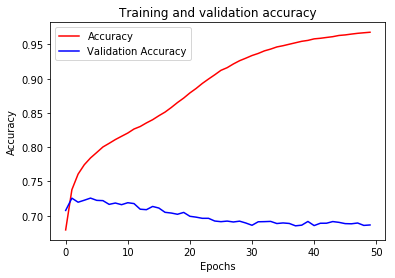

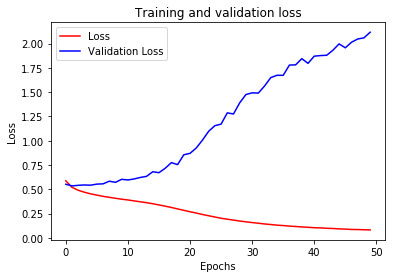

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()


# Expected Output
# A chart where the validation loss does not increase sharply!